# Beyond A/B Tests

In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [6]:
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/ess_combined_2012_2014.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8147 entries, 0 to 8146
Data columns (total 13 columns):
cntry      8147 non-null object
idno       8147 non-null int64
year       8147 non-null int64
tvtot      8147 non-null int64
ppltrst    8147 non-null int64
pplfair    8147 non-null int64
pplhlp     8147 non-null int64
happy      8147 non-null int64
sclmeet    8147 non-null int64
sclact     8147 non-null int64
gndr       8147 non-null int64
agea       8147 non-null int64
partner    8147 non-null int64
dtypes: int64(12), object(1)
memory usage: 827.6+ KB


,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5,6,3,3,10,5,8,5,4,2,60,1
1,CH,25,6,6,5,7,5,9,3,2,2,59,1
2,CH,26,6,1,8,8,8,7,6,3,1,24,2
3,CH,28,6,4,6,6,7,10,6,2,2,64,1
4,CH,29,6,5,6,7,5,8,7,2,2,55,1


### 1. Did people become less trusting from 2012 to 2014?

In [7]:
df.year.value_counts()

7    4076
6    4071
Name: year, dtype: int64

In [8]:
# Separate into groups by year
df_2012 = df.loc[df.year == 6]
df_2014 = df.loc[df.year == 7]

In [9]:
print('2012 group size:', len(df_2012))
print('2014 group size:', len(df_2014))

2012 group size: 4071
2014 group size: 4076


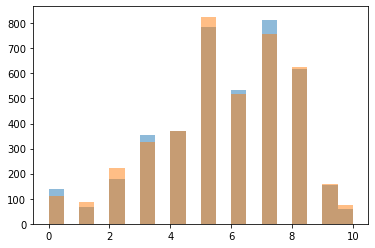

The distributions look nearly identical
variables not continuous


In [11]:
plt.hist(df_2012.ppltrst, alpha=.5, bins=20)
plt.hist(df_2014.ppltrst, alpha=.5, bins=20)
plt.show()
print('The distributions look nearly identical')
print('variables not continuous')

In [116]:
print(stats.shapiro(df_2012.ppltrst))
print('non-normal')

(0.9520939588546753, 1.4426241793085802e-34)
non-normal


In [117]:
print(stats.shapiro(df_2014.ppltrst))
print('non-normal')

(0.9580563902854919, 9.222525335052542e-33)
non-normal


In [15]:
# Perform parametric and non-parametric comparisons just in case
print(stats.ttest_ind(df_2012.ppltrst, df_2014.ppltrst))
print(stats.kruskal(df_2012.ppltrst, df_2014.ppltrst))

Ttest_indResult(statistic=0.1443685081969842, pvalue=0.8852130548889106)
KruskalResult(statistic=0.11927994139654356, pvalue=0.7298167669759283)


None of these tests revealed any statistical significance to reject the null hypothesis that the distributions are the same.

### 2. Did people become happier from 2012 to 2014? 

In [16]:
df.happy.value_counts()

8     2424
9     1671
7     1453
10    1077
6      580
5      560
4      166
3      118
2       55
0       22
1       21
Name: happy, dtype: int64

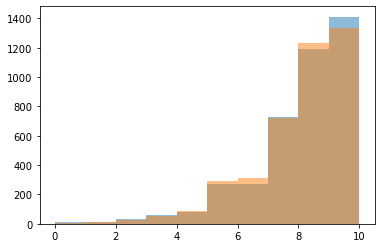

These distributions are definitely not normal. Will be using a non-parametric test to compare distributions.


In [47]:
plt.hist(df_2012.happy, alpha=.5)
plt.hist(df_2014.happy, alpha=.5)
plt.show()
print('These distributions are definitely not normal. Will be using a non-parametric test to compare distributions.')

Ho: There is no difference in the median or variance between the two distributions
Ha: There is a significant difference in the median or variance between the two distributions

In [48]:
print('Kruskal test results:', stats.kruskal(df_2012.happy, df_2014.happy))
print('This is a sketchy p-value...')

Kruskal test results: KruskalResult(statistic=3.725441202182227, pvalue=0.05358946830655459)
This is a sketchy p-value...


In [49]:
print('MannWhitneyU test results:', stats.mannwhitneyu(df_2012.happy, df_2014.happy))
print('This is a slightly better p-value...')

MannWhitneyU test results: MannwhitneyuResult(statistic=8096343.0, pvalue=0.02679503248642277)
This is a slightly better p-value...


In [58]:
print(np.median(df_2012.happy))
print(np.median(df_2014.happy))

8.0
8.0


Visually, logically, and differentially, there are no significant differences to indicate people are less happy in 2014 than in 2012

### 3. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [61]:
df_2014['cntry'].value_counts()

ES    1134
SE     867
CH     743
NO     712
CZ     606
DE      14
Name: cntry, dtype: int64

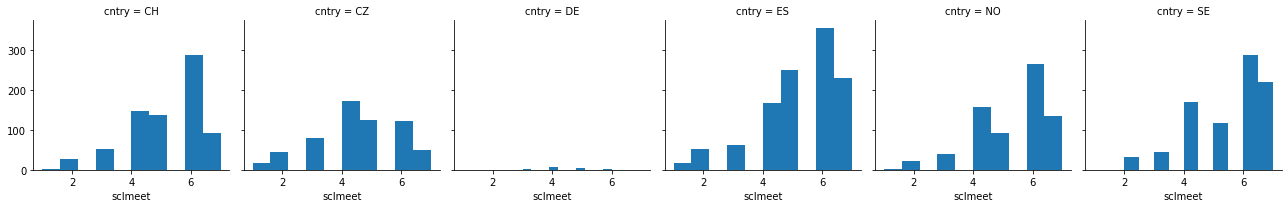

In [81]:
g = sns.FacetGrid(df_2014, col='cntry')
g.map(plt.hist, 'sclmeet')

Denmark definitely stood out among the rest of the countries, in part because they had hardly as many observations as the rest of the countries, but because they averaged around 5 rather than 7.

## ANSWERS FOR 3

### 3. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [119]:
# How many unique countries are there?
ess_2014 = df_2014
ess_2014['cntry'].unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A255907358>,
      dtype=object)

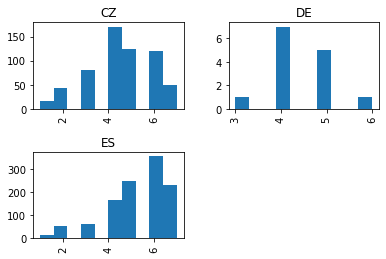

In [120]:
# I am going to pick CZ, DE and ES

filter_list = ['CZ', 'DE', 'ES']
ess_2014_cz_de_es = ess_2014[ess_2014['cntry'].isin(filter_list)]

ess_2014_cz_de_es['cntry'].unique()

ess_2014_cz_de_es['sclmeet'].hist(by = ess_2014_cz_de_es['cntry'])

In [121]:
# these are sparser samples of ordinal data
# so nothing will be perfectly "normal,"
# we will have to "eyeball" it.
# we will do a Kruskal Wallis test

stats.kruskal(
    ess_2014_cz_de_es.loc[ess_2014_cz_de_es['cntry'] == 'CZ',['sclmeet']],
    ess_2014_cz_de_es.loc[ess_2014_cz_de_es['cntry'] == 'DE',['sclmeet']],
    ess_2014_cz_de_es.loc[ess_2014_cz_de_es['cntry'] == 'ES',['sclmeet']])

KruskalResult(statistic=120.72958033262947, pvalue=6.0800161031835895e-27)

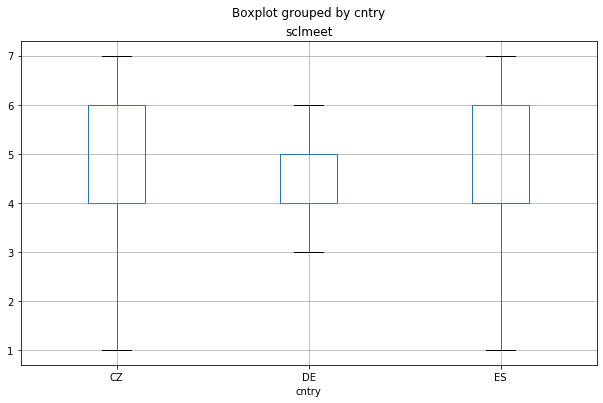

In [122]:
# It appears that not all medians are equal, so
# Which one is the odd country out?
# I'm thinking DE

ess_2014_cz_de_es.boxplot('sclmeet', by='cntry', figsize=(10, 6))

### 4. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

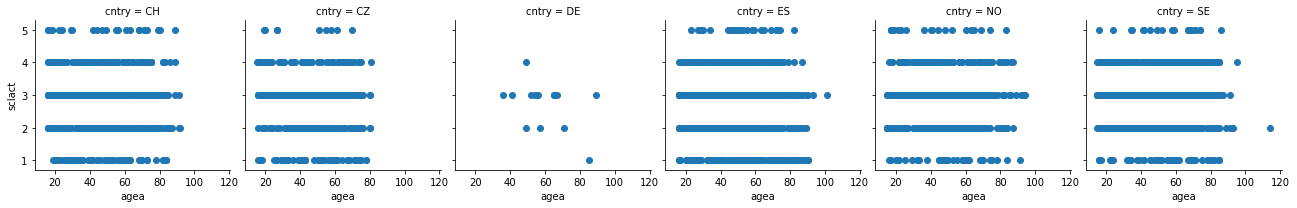

In [82]:
g = sns.FacetGrid(df_2014, col='cntry')
g.map(plt.scatter, 'agea', 'sclact')

Again, DE stands out because there are so much fewer observations

## ANSWERS for 4

### 4. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A256B62278>,
      dtype=object)

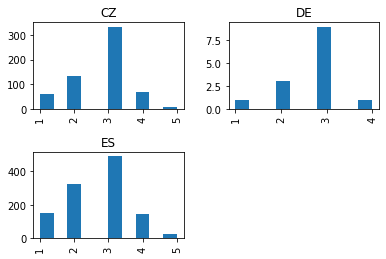

In [123]:
# Variable sclact
# I will stick with the same countries as above

ess_2014_cz_de_es['sclact'].hist(by = ess_2014_cz_de_es['cntry'])

# These look a little more normal to me. 
# At least they are symmetrical.
# So let's do a one-way ANOVA.


In [124]:
stats.f_oneway(
    ess_2014_cz_de_es.loc[ess_2014_cz_de_es['cntry'] == 'CZ',['sclact']],
    ess_2014_cz_de_es.loc[ess_2014_cz_de_es['cntry'] == 'DE',['sclact']],
    ess_2014_cz_de_es.loc[ess_2014_cz_de_es['cntry'] == 'ES',['sclact']])

# No significant difference in groups.


F_onewayResult(statistic=array([2.28963493]), pvalue=array([0.10160666]))

In [125]:
# Let's check pairwise statistics with Tukey's HSD.

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = ess_2014_cz_de_es['sclact'],      # Data
                          groups = ess_2014_cz_de_es['cntry'],   # Groups
                          alpha=0.05) 


tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
CZ,DE,-0.0151,0.9,-0.5946,0.5644,False
CZ,ES,-0.098,0.0841,-0.2058,0.0099,False
DE,ES,-0.0829,0.9,-0.6594,0.4936,False


# PART TWO

### 1. Is there a significant difference in the number of unique designs drawn by the same participants from Measurement 2 to Measurement 3?

In [84]:
rfft = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/rfft.csv')

In [85]:
rfft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7545 entries, 0 to 7544
Data columns (total 8 columns):
Casenr           7545 non-null int64
Age              7545 non-null int64
Gender           7545 non-null object
Education        7545 non-null object
Measurement      7545 non-null object
Unique           7545 non-null float64
Perseverative    7545 non-null float64
Interval         7545 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 471.7+ KB


In [86]:
rfft.head()

,Casenr,Age,Gender,Education,Measurement,Unique,Perseverative,Interval
0,1,74,Male,Lower secondary school (ISCED 2),Measurement 1 (2003-2006),32.0,1.0,Not applicable
1,1,74,Male,Lower secondary school (ISCED 2),Measurement 2 (2006-2008),35.0,0.0,2.842122556
2,1,74,Male,Lower secondary school (ISCED 2),Measurement 3 (2008-2012),50.5,14.5,2.201232033
3,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 1 (2003-2006),26.0,3.0,Not applicable
4,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 2 (2006-2008),47.0,3.0,2.762718362


In [87]:
rfft.describe()

,Casenr,Age,Unique,Perseverative
count,7545.000000,7545.000000,7545.000000,7545.000000
mean,1258.000000,52.559046,78.113188,11.927038
std,726.066023,10.399381,27.195229,14.627181
min,1.000000,35.000000,13.000000,0.000000
25%,629.000000,44.000000,57.000000,4.000000
50%,1258.000000,52.000000,78.500000,7.500000
75%,1887.000000,59.000000,97.000000,14.000000
max,2515.000000,82.000000,161.500000,133.500000


In [88]:
rfft.describe(include='O')

,Gender,Education,Measurement,Interval
count,7545,7545,7545,7545
unique,2,4,3,1069
top,Male,4,Measurement 2 (2006-2008),Not applicable
freq,4002,2892,2515,2515


In [102]:
m2 = rfft.loc[rfft['Measurement'] == 'Measurement 2 (2006-2008)']
m3 = rfft.loc[rfft['Measurement'] == 'Measurement 3 (2008-2012)']

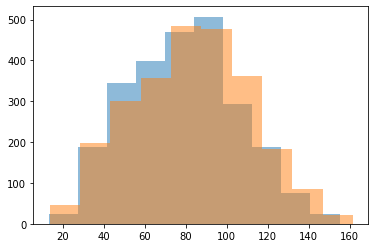

shapiro m2 (0.9909505248069763, 1.7879258837338874e-11)
shapiro m3 (0.9922635555267334, 2.5078944476675247e-10)


In [105]:
plt.hist(m2.Unique, alpha=.5)
plt.hist(m3.Unique, alpha=.5)
plt.show()
print('shapiro m2', stats.shapiro(m2.Unique))
print('shapiro m3', stats.shapiro(m3.Unique))

With two normally distributed samples, we'll perform a parametric comparison test.

Ho: There is no difference between the means of the samples
Ha: There is a significnt difference between the means of the samples

In [107]:
stats.ttest_ind(m2.Unique, m3.Unique)

Ttest_indResult(statistic=-5.172289431795646, pvalue=2.4021740879907784e-07)

Reject Ho. Accept alternative hypothesis that there is a difference between means.

## ANSWERS to 1

In [126]:
# To ease in our analysis let's pivot the data.

rfft_unique = rfft.pivot(index='Casenr', columns='Measurement', values='Unique')
rfft_unique.head()

Measurement,Measurement 1 (2003-2006),Measurement 2 (2006-2008),Measurement 3 (2008-2012)
Casenr,,,
1,32.0,35.0,50.5
2,26.0,47.0,71.0
3,91.0,83.5,77.0
4,59.0,54.0,64.0
5,60.0,68.0,21.0


DescribeResult(nobs=2515, minmax=(-75.5, 68.5), mean=4.015506958250497, variance=342.2368318331855, skewness=-0.15837265462838976, kurtosis=0.7823714353134701)


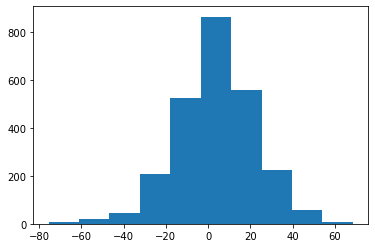

In [127]:
# The differences appear normally distributed.
# So we ill use a paired t-test.

plt.hist(rfft_unique['Measurement 3 (2008-2012)'] - rfft_unique['Measurement 2 (2006-2008)'])
print(stats.describe(rfft_unique['Measurement 3 (2008-2012)'] - rfft_unique['Measurement 2 (2006-2008)']))

In [ ]:

stats.ttest_rel(rfft_unique['Measurement 3 (2008-2012)'], rfft_unique['Measurement 2 (2006-2008)'])

Yes, there appears to be a significant difference between unique designs by the same participants between Measurements 2 and 3.

### 2. Is there a significant difference in the number of perseverative errors drawn by the same participants from Measurement 2 to Measurement 3? 

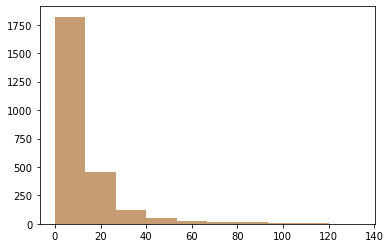

shapiro m2 (0.6725998520851135, 0.0)
shapiro m3 (0.7084382176399231, 0.0)


In [109]:
plt.hist(m2.Perseverative, alpha=.5)
plt.hist(m2.Perseverative, alpha=.5)
plt.show()
print('shapiro m2', stats.shapiro(m2.Perseverative))
print('shapiro m3', stats.shapiro(m3.Perseverative))

These are definitely not normal! Going to use a nonparametric test for this one!

Ho: There is no difference between the medians or variances of these samples
Ha: There is a significant difference between the medians or variances of these samples

In [111]:
stats.kruskal(m2.Perseverative, m3.Perseverative)

KruskalResult(statistic=4.888785605096552, pvalue=0.027031693666595576)

In [112]:
print(np.median(m2.Perseverative))
print(np.median(m3.Perseverative))

7.0
8.0


In [113]:
# One more test:
stats.mannwhitneyu(m2.Perseverative, m3.Perseverative)

MannwhitneyuResult(statistic=3048799.5, pvalue=0.013516183117964028)

Reject Ho and conclude that there is a statistically significant difference between the medians of the sample. However, a difference of 1.0 doesn't seem like that important of a value.

## ANSWERS for 2

In [128]:
# Again, let's pivot the data

rfft_persev = rfft.pivot(index='Casenr', columns='Measurement', values='Perseverative')
rfft_persev.head()

Measurement,Measurement 1 (2003-2006),Measurement 2 (2006-2008),Measurement 3 (2008-2012)
Casenr,,,
1,1.0,0.0,14.5
2,3.0,3.0,0.5
3,11.0,21.0,17.0
4,49.0,39.0,11.0
5,14.0,16.0,0.0


(array([1.821e+03, 4.560e+02, 1.210e+02, 5.200e+01, 2.800e+01, 1.600e+01,
        1.300e+01, 3.000e+00, 4.000e+00, 1.000e+00]),
 array([  0.  ,  13.35,  26.7 ,  40.05,  53.4 ,  66.75,  80.1 ,  93.45,
        106.8 , 120.15, 133.5 ]),
 <a list of 10 Patch objects>)

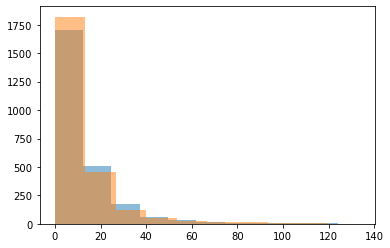

In [129]:
# Looks quite non-normal, so we'll use Wilcoxon

plt.hist(rfft_persev['Measurement 3 (2008-2012)'], alpha = .5)
plt.hist(rfft_persev['Measurement 2 (2006-2008)'], alpha = .5)

In [130]:
# Reject the null, there is a significant difference between perseverative errors
# from the same participants at Measurements 2 and 3

stats.wilcoxon(rfft_persev['Measurement 3 (2008-2012)'], rfft_persev['Measurement 2 (2006-2008)'])

WilcoxonResult(statistic=1358373.0, pvalue=0.0006927535563546565)